## Titanic Dataset Overview

The Titanic dataset contains information about passengers aboard the Titanic, including survival status, demographics, and travel details. It has **891 rows** and **15 columns**.

### Feature Dictionary

| Feature      | Description                                                                 | Datatype    | Non-Null Count |
|--------------|-----------------------------------------------------------------------------|-------------|----------------|
| `survived`  | Survival status (0 = No, 1 = Yes)                                           | `int64`    | 891            |
| `pclass`    | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                                    | `int64`    | 891            |
| `sex`       | Sex (male, female)                                                          | `object`   | 891            |
| `age`       | Age in years                                                                | `float64`  | 714            |
| `sibsp`     | Number of siblings/spouses aboard                                           | `int64`    | 891            |
| `parch`     | Number of parents/children aboard                                           | `int64`    | 891            |
| `fare`      | Passenger fare                                                              | `float64`  | 891            |
| `embarked`  | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)         | `object`   | 889            |
| `class`     | Passenger class (categorical version of pclass)                              | `category` | 891            |
| `who`       | Category of passenger (man, woman, child)                                    | `object`   | 891            |
| `adult_male`| Whether the passenger is an adult male                                       | `bool`     | 891            |
| `deck`      | Deck the cabin was on (missing for many)                                     | `category` | 203            |
| `embark_town`| Port of embarkation (full town names)                                        | `object`   | 889            |
| `alive`     | Survival status (string version: yes/no)                                     | `object`   | 891            |
| `alone`     | Whether the passenger traveled alone                                         | `bool`     | 891            |


### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Loading the Dataset from Seaborn

In [3]:
titanic = sns.load_dataset("titanic")

In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# Calculate survival percentages by sex
survival_by_sex = titanic.groupby("sex")["alive"].value_counts(normalize=True).unstack() * 100
survival_by_sex = survival_by_sex.T

In [6]:
sns.set_color_codes("bright")

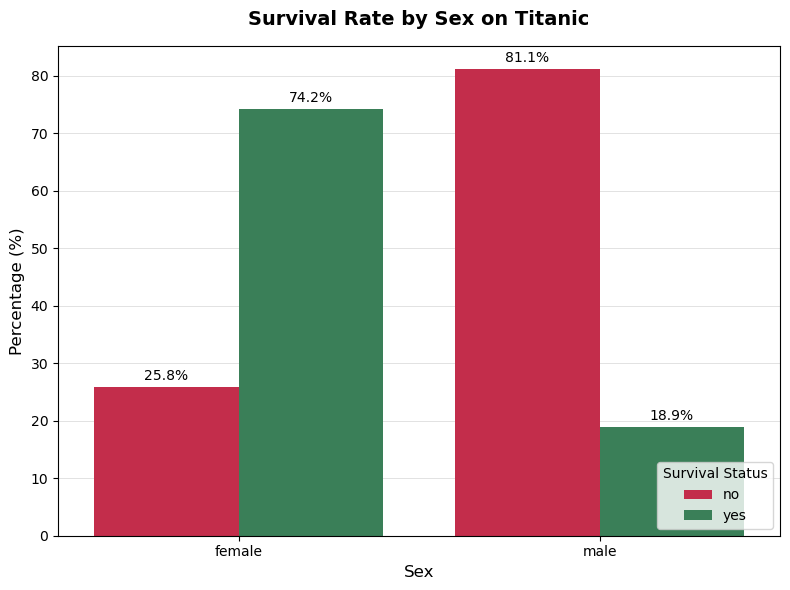

In [7]:
survival_by_sex_melted = survival_by_sex.reset_index().melt(id_vars="alive", var_name="sex", value_name="percentage")

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=survival_by_sex_melted, x="sex", y="percentage", hue="alive", ax=ax, palette={"yes": "#2E8B57", "no": "#DC143C"})

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", padding=3)

ax.set_xlabel("Sex", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.set_title("Survival Rate by Sex on Titanic", fontsize=14, fontweight="bold", pad=15)
ax.legend(title="Survival Status", loc="lower right")
ax.grid(True, axis="y", alpha=0.4, linewidth=0.4, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()